In [ ]:
!pip install -Uqq nixtla dask-expr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.5/244.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-nlPrQBgeS2R3k0n0oRrvcAQlkE7trLo9Nyspwz3mMFeZqSu6fdfHa0xMkjzsaD5z0WSEMEIOwBIQXX8j'
)

In [ ]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/peyton-manning.csv')
df.head()

,unique_id,ds,y
0,0,2007-12-10,9.590761
1,0,2007-12-11,8.519590
2,0,2007-12-12,8.183677
3,0,2007-12-13,8.072467
4,0,2007-12-14,7.893572


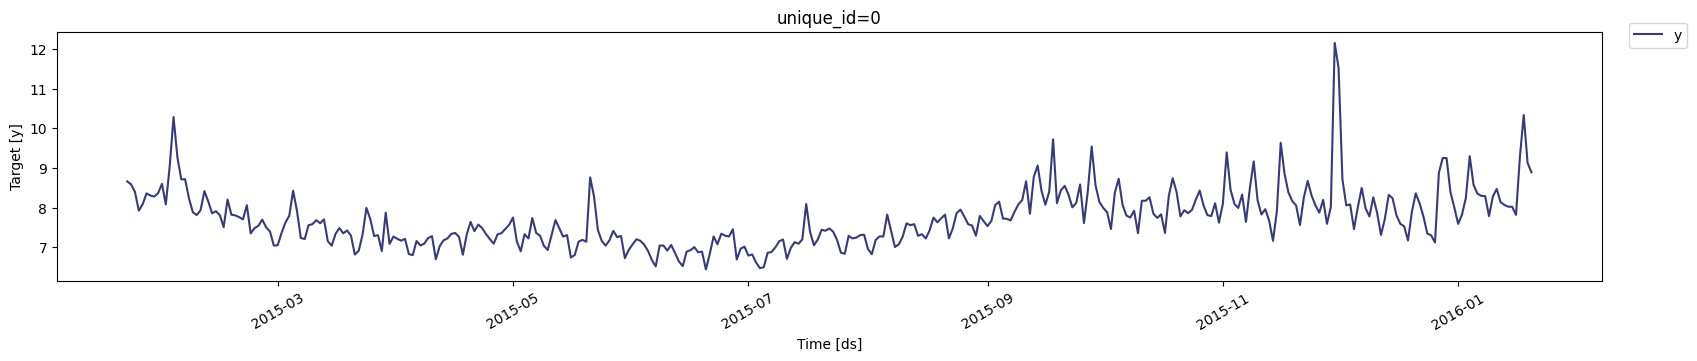

In [ ]:
nixtla_client.plot(df, max_insample_length=365)

In [ ]:
anomalies_df = nixtla_client.detect_anomalies(df, freq='D')
anomalies_df.head()

,unique_id,ds,y,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,0,2008-01-10,8.281724,8.224187,9.503586,6.944788,False
1,0,2008-01-11,8.292799,8.151533,9.430932,6.872135,False
2,0,2008-01-12,8.199189,8.127243,9.406642,6.847845,False
3,0,2008-01-13,9.996522,8.917259,10.196658,7.637861,False
4,0,2008-01-14,10.127071,9.002326,10.281725,7.722928,False


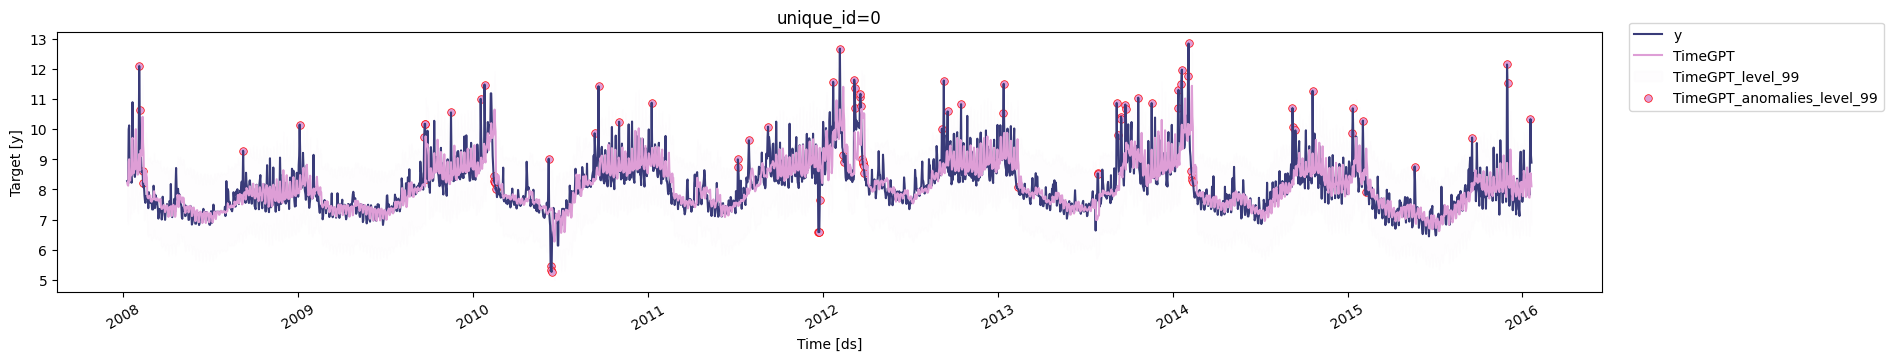

In [ ]:
nixtla_client.plot(df, anomalies_df)

In [ ]:
anomalies_df_x = nixtla_client.detect_anomalies(
    df,
    freq='D',
    date_features=['month', 'year'],
    date_features_to_one_hot=True,
)

<Axes: ylabel='features'>

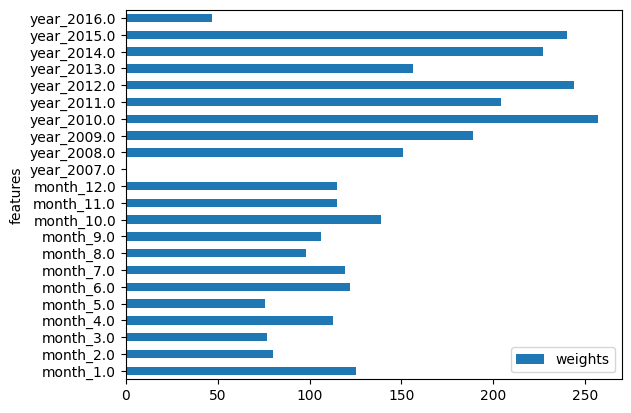

In [ ]:
nixtla_client.weights_x.plot.barh(x='features', y='weights')

In [ ]:
anomalies_df = nixtla_client.detect_anomalies(
    df,
    freq='D',
    level=70
)

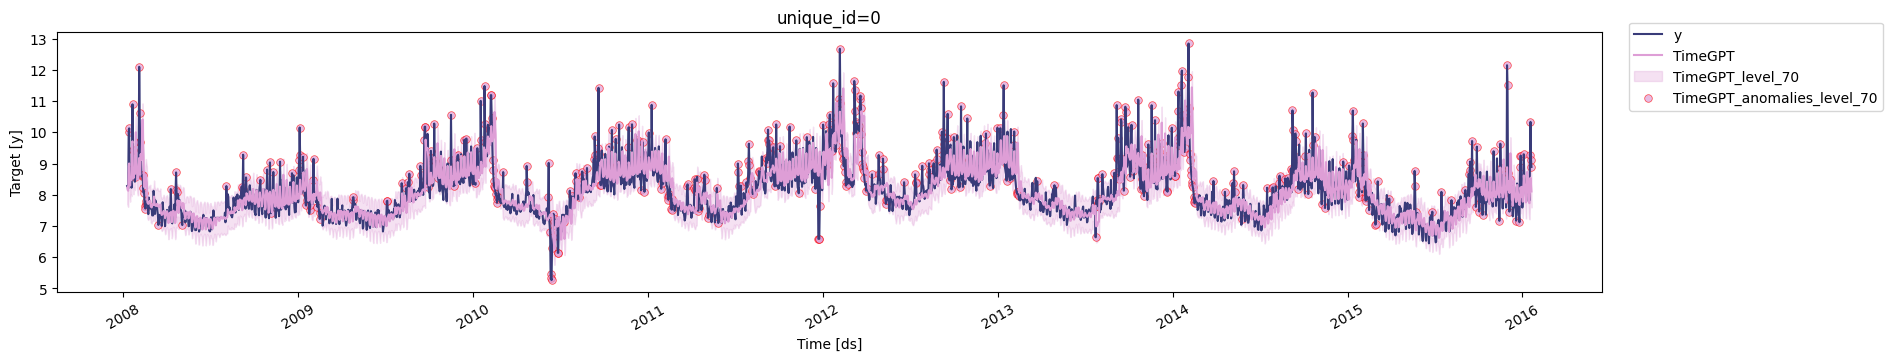

In [ ]:
nixtla_client.plot(df, anomalies_df)